## Zomato Data Analysis

##### We would first proceed with missing Value Analysis, Treatment and Datatype Conversion and then later on move towards exploratory data analysis so that the missing values do not pollute our insights and representations

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
tp = pd.read_csv('zomato.csv',sep=',')
tp.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
tp.shape

(51717, 17)

- Let us now check for the info of the data frame that tells us the count of non-null data for each variable and also it's data type

In [3]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

* We can se that few of the columns have missing values and few columns are not in the preferred datatype.

### Dropping and Renaming Columns

* We firstly drop columns that are not essential and those which would not add to our analysis.
* Unique columns such as URL, Address, Name and Phone can be dropped

In [4]:
tp.drop(columns=['url','address','name','phone',"dish_liked","reviews_list","listed_in(city)","menu_item"],inplace=True)

- Renaming the columns for convineance and better understanding

In [5]:
tp.rename(columns={"rate":"rating_out_of_5","approx_cost(for two people)":"cost_for_2","listed_in(type)":"food_rest_category"},inplace=True)

In [6]:
tp.head()

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### Missing Value Analysis, Treatment and Datatype Conversion

*  graphically analyse the missingness in the data using the missingno package

<AxesSubplot:>

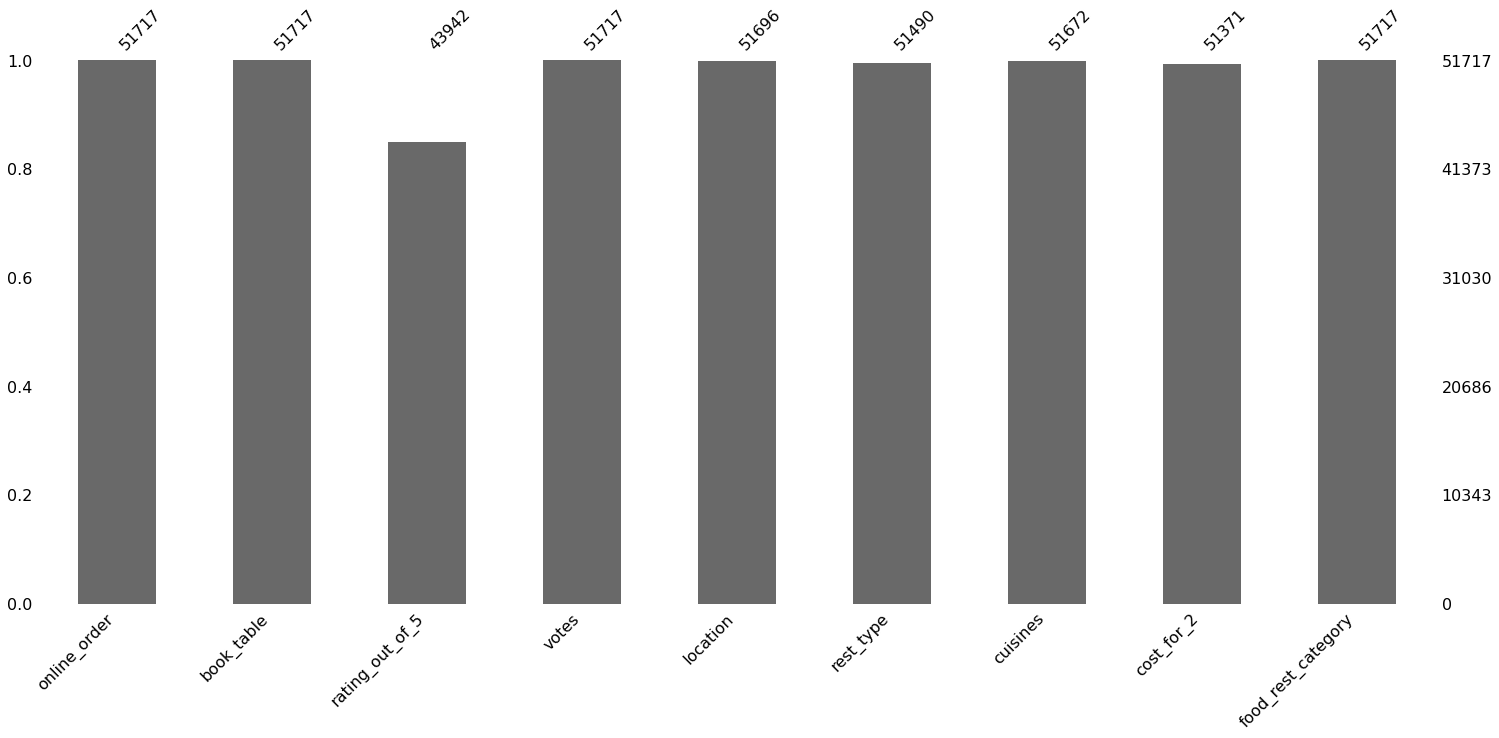

In [7]:
msno.bar(tp)

* check for the nullity matrix which shows us the density of the missing data and check for any patterns.

<AxesSubplot:>

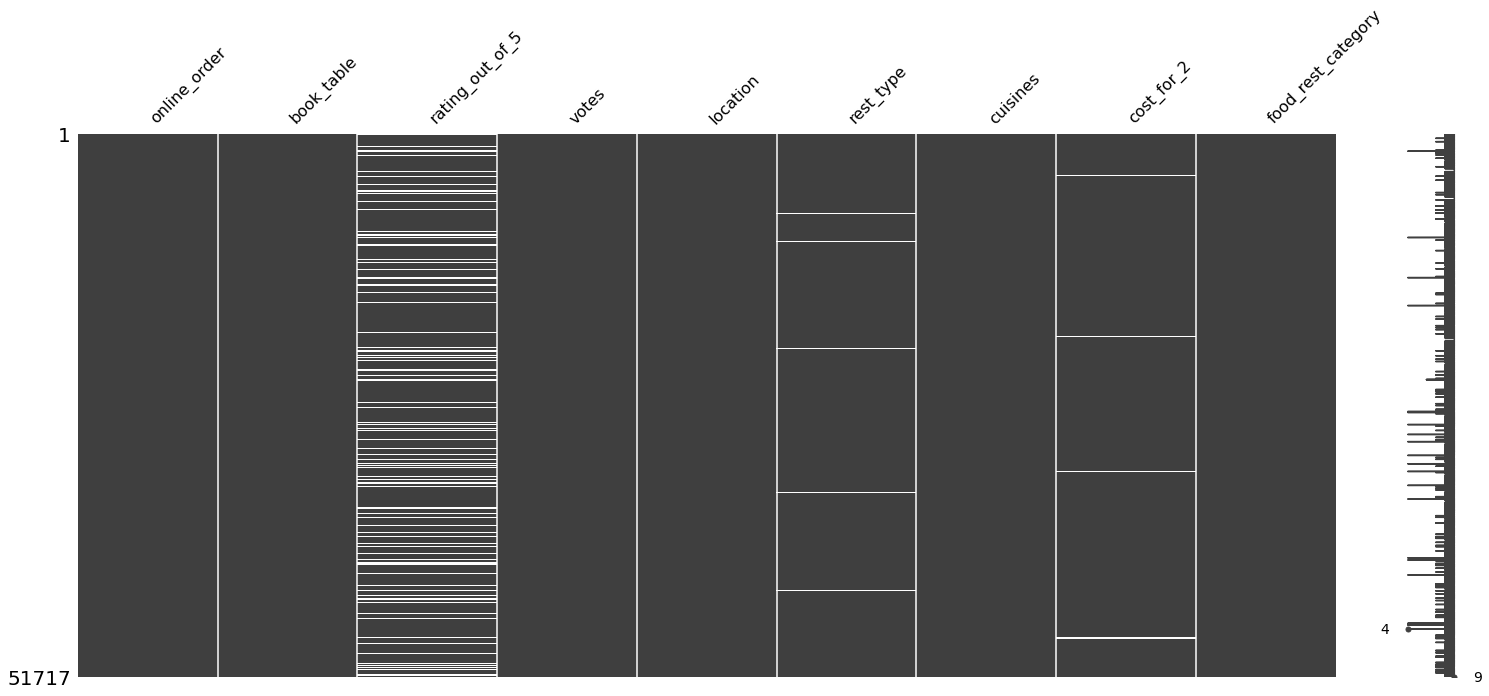

In [8]:
msno.matrix(tp)

* To check for the reason for missing data we can sort the rating column and check for patterns if any.

<AxesSubplot:>

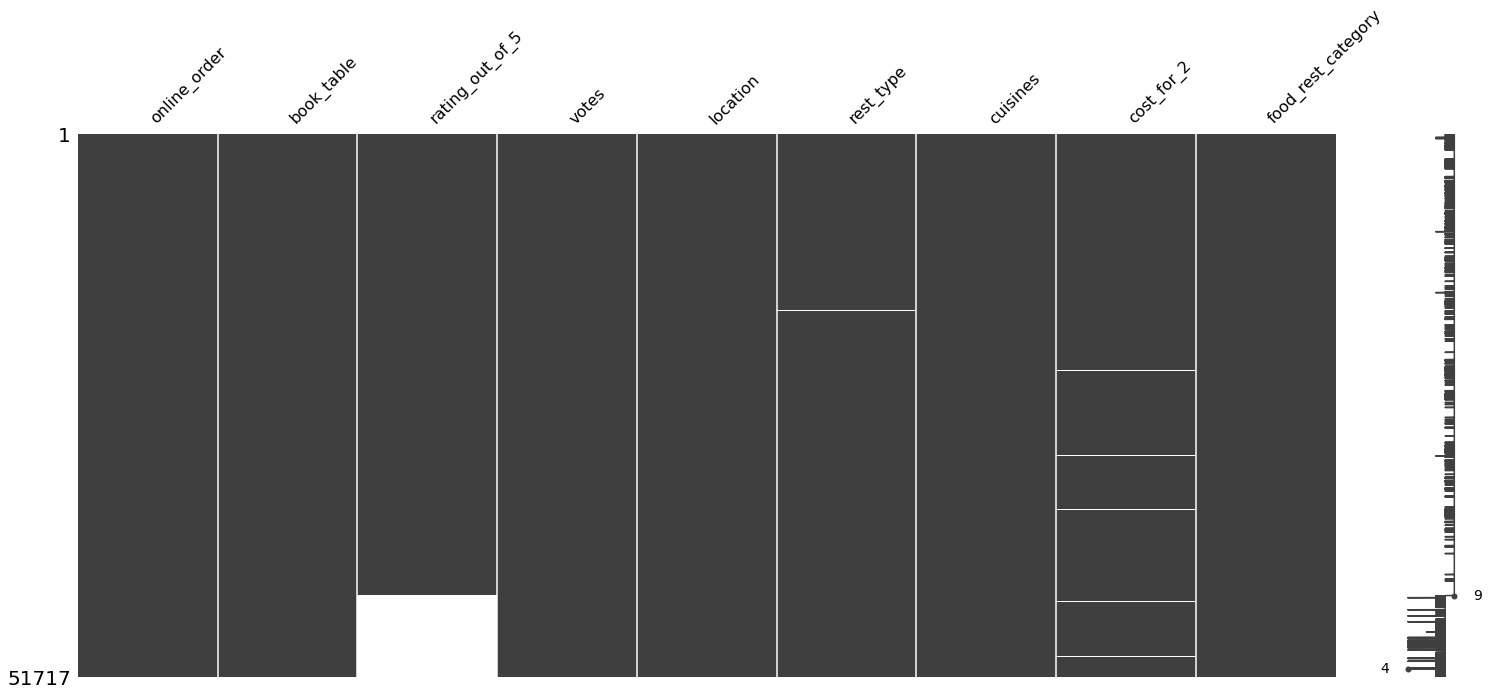

In [9]:
sorted = tp.sort_values('rating_out_of_5')
msno.matrix(sorted)

* It is clear that there is no relation between the missingness of the ratings anad the cost,the restaurant type ot other columns with missing values.

<AxesSubplot:>

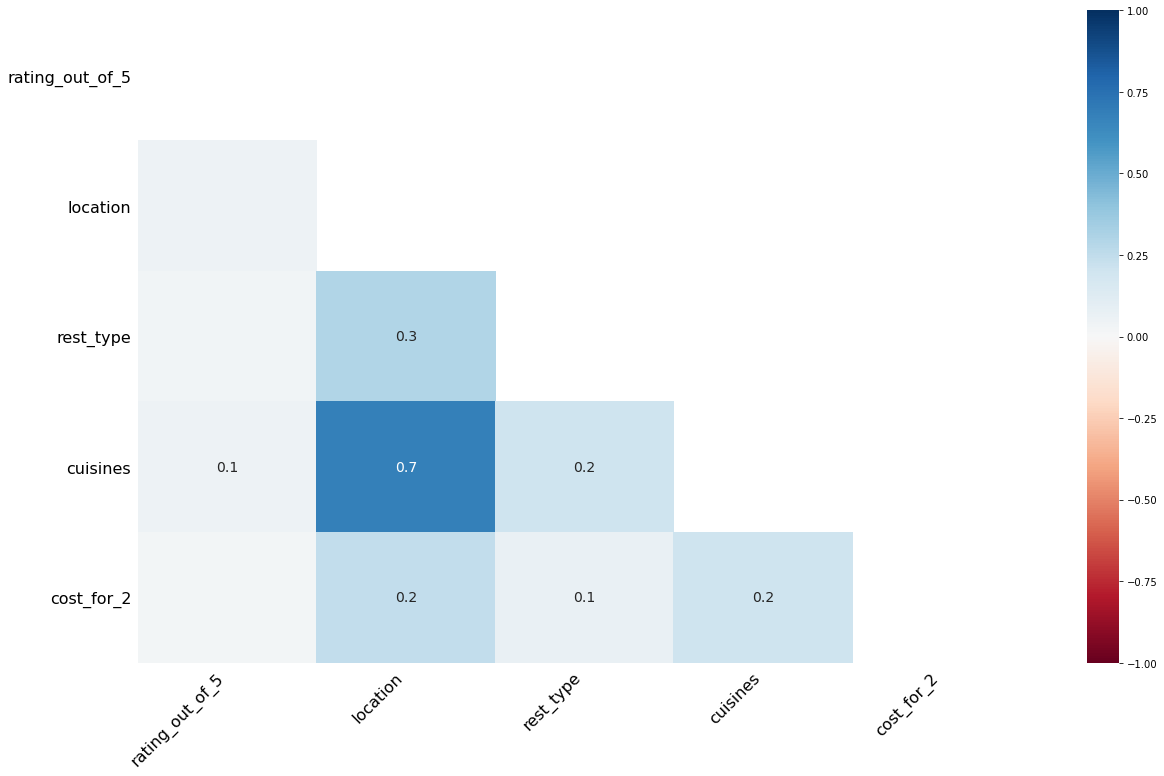

In [10]:
msno.heatmap(tp)

* The heatmap shows that there are no strong correlations between missing values of different features except between cuisines and location.

<AxesSubplot:>

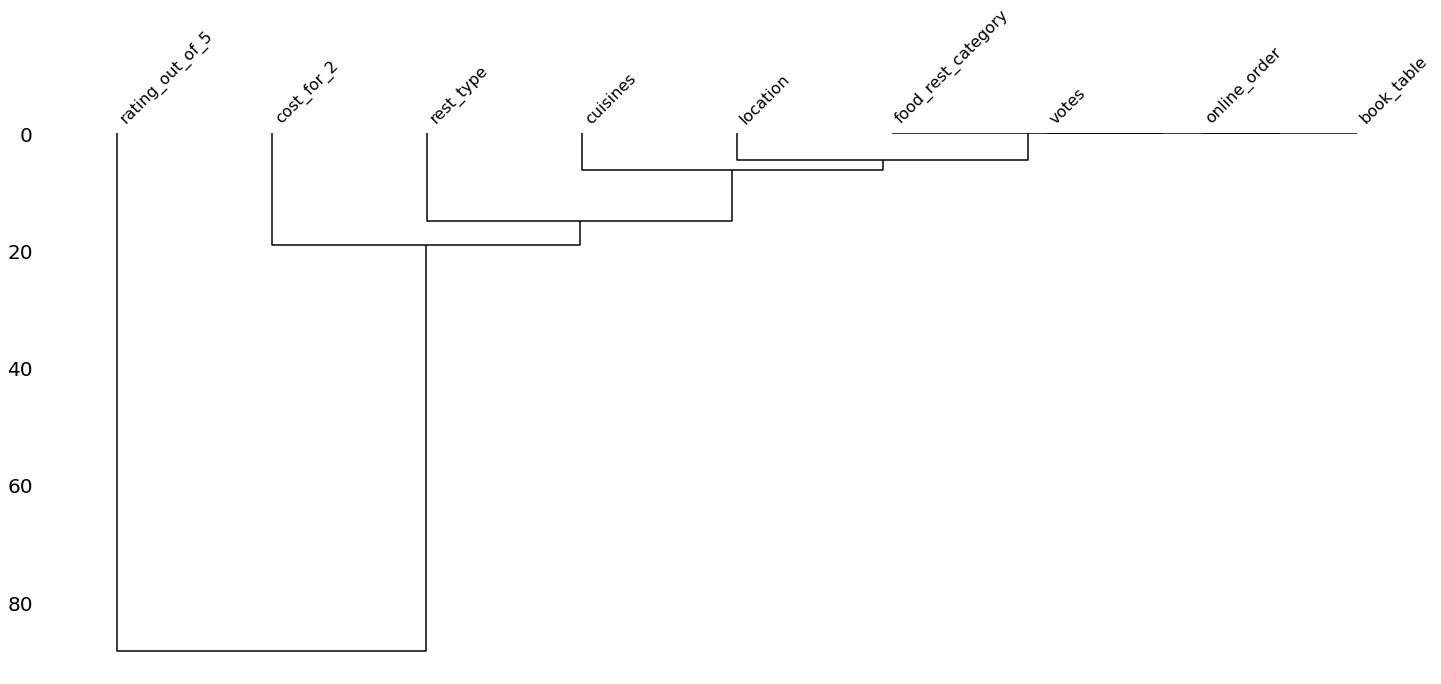

In [11]:
msno.dendrogram(tp)

* We can see that missing values in ratings tends to be more similar wth cost_for_2.
* We will now proceed to analyse each of the variables in detail.
* Let us first check for the count and percentage of missing values.

In [12]:
tp.isnull().sum()

online_order             0
book_table               0
rating_out_of_5       7775
votes                    0
location                21
rest_type              227
cuisines                45
cost_for_2             346
food_rest_category       0
dtype: int64

In [13]:
round(100*(tp.isnull().sum()/len(tp.index)),2)

online_order           0.00
book_table             0.00
rating_out_of_5       15.03
votes                  0.00
location               0.04
rest_type              0.44
cuisines               0.09
cost_for_2             0.67
food_rest_category     0.00
dtype: float64

* We can see that the rating columns has the highest percentage of missing values.
* Let us first Analyse the missing Data for the column rating_out_of_5

In [14]:
tp.rating_out_of_5.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

* We can see that almost all the data points of the rating variable are numeric except three cases: NEW, - and nan that indicates a missing value.

In [15]:
tp[(tp["rating_out_of_5"]=='NEW')][:5]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
72,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,Delivery
75,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery
110,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,Delivery
130,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200,Delivery
131,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100,Delivery


In [16]:
tp[(tp["rating_out_of_5"]=='-')][:5]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
3068,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400,Delivery
3069,No,No,-,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3373,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300,Dine-out
3378,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300,Dine-out
3387,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300,Dine-out


In [17]:
tp[(tp["rating_out_of_5"].isna())][:5]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
84,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery
90,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery
91,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery
92,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery
107,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery


* This points to the fact that the missing values in the Ratings column is structurally missing for a logical reason that the restaurant may be new since the voters is equal to 0.
* Let us first extract the correct rating from the ratings column, we would be needing the number before '/'

In [18]:
tp.rating_out_of_5=tp.rating_out_of_5.str.split('/').str[0]
tp.rating_out_of_5

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rating_out_of_5, Length: 51717, dtype: object

* We now replace the three cases i.e. NEW, -, and the missing values with 0 using fillna() and recheck for the unique values.

In [19]:
tp.rating_out_of_5.replace({"NEW":0},inplace=True)
tp.rating_out_of_5.replace({"-":0},inplace=True)
tp.rating_out_of_5=tp.rating_out_of_5.fillna(0)

In [20]:
tp.rating_out_of_5.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

* We then finally convert the ratings columns from object to numeric data type.

In [21]:
tp.rating_out_of_5=tp.rating_out_of_5.astype('float')

In [22]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_order        51717 non-null  object 
 1   book_table          51717 non-null  object 
 2   rating_out_of_5     51717 non-null  float64
 3   votes               51717 non-null  int64  
 4   location            51696 non-null  object 
 5   rest_type           51490 non-null  object 
 6   cuisines            51672 non-null  object 
 7   cost_for_2          51371 non-null  object 
 8   food_rest_category  51717 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.6+ MB


* Let us now go ahead with the next variable with missing values.

In [23]:
tp.isnull().sum()

online_order            0
book_table              0
rating_out_of_5         0
votes                   0
location               21
rest_type             227
cuisines               45
cost_for_2            346
food_rest_category      0
dtype: int64

* We will now check for the variable location, as stated earlier through the heatmap, there is a strong correlation of missing values between cuisines and location.
* Let us first attract the common row items which have both location and cuisines missing

In [24]:
tp[(tp["location"].isna())&(tp["cuisines"].isna())]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
1662,No,No,0.0,0,NaN,NaN,NaN,NaN,Delivery
9874,No,No,0.0,0,NaN,NaN,NaN,NaN,Delivery
13693,No,No,0.0,0,NaN,NaN,NaN,NaN,Delivery
16351,No,No,0.0,0,NaN,NaN,NaN,NaN,Delivery
26432,No,No,0.0,0,NaN,NaN,NaN,NaN,Dine-out
26519,No,No,0.0,0,NaN,NaN,NaN,NaN,Buffet
27672,No,No,0.0,0,NaN,NaN,NaN,NaN,Delivery
28611,No,No,0.0,0,NaN,NaN,NaN,NaN,Dine-out
29298,No,No,0.0,0,NaN,NaN,NaN,NaN,Buffet
30604,No,No,0.0,0,NaN,NaN,NaN,NaN,Delivery


* We can see that this is a clear case of Missing not at random (MNAR). These might be restaurants that did not want to partner with Zomato after showing initial interest. Hence it would be better to remove these row items where location is missing using notna() since there exact 21 row items.

In [25]:
tp=tp[(tp["location"].notna())]

In [26]:
tp.isnull().sum()

online_order            0
book_table              0
rating_out_of_5         0
votes                   0
location                0
rest_type             206
cuisines               24
cost_for_2            325
food_rest_category      0
dtype: int64

* Let us now check for the missing values in rest_type

In [27]:
tp[(tp["rest_type"].isna())]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
999,Yes,No,3.5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Yes,No,3.0,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1376,Yes,No,3.6,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1565,No,No,0.0,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1637,No,No,2.4,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...
50978,No,No,0.0,0,Whitefield,NaN,Bakery,200,Desserts
51130,Yes,No,0.0,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900,Dine-out
51195,Yes,No,3.2,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out
51294,No,No,0.0,0,Whitefield,NaN,"North Indian, South Indian",500,Dine-out


* Let us now check if there is any link between the missing values of the rest_type and the food_rest_category using crosstabs

In [28]:
pd.crosstab(tp.food_rest_category,tp.rest_type.isnull(),dropna=False)

rest_type,False,True
food_rest_category,,
Buffet,878,0
Cafes,1722,0
Delivery,25815,118
Desserts,3584,9
Dine-out,17693,79
Drinks & nightlife,1101,0
Pubs and bars,697,0


* We can see that there isnt any such link and the missing values are spread across the two different values of the food_rest category.
* Let us deep dive into the food_rest_category to see if there is a clear winner in terms of frequency distribution.

In [29]:
tp[(tp.food_rest_category=='Delivery')]['rest_type'].value_counts()

Quick Bites                  10054
Casual Dining                 5043
Delivery                      2474
Takeaway, Delivery            1886
Cafe                          1182
                             ...  
Quick Bites, Mess                2
Food Court, Beverage Shop        2
Bhojanalya                       2
Quick Bites, Meat Shop           2
Dessert Parlor, Kiosk            1
Name: rest_type, Length: 73, dtype: int64

* Though there is, it isnt conclusive to usee the corresponding rest_type value for the missing rest_type values. We can say that this is MCAR.
* We can remove these row items completely since they are of a negligible percentage - 0.40% and would not cause much change in the isnights that we obtain.

In [30]:
tp=tp[tp['rest_type'].notna()]
tp.isnull().sum()

online_order            0
book_table              0
rating_out_of_5         0
votes                   0
location                0
rest_type               0
cuisines               24
cost_for_2            323
food_rest_category      0
dtype: int64

* We then proceed to analyse the next variable with missing values i.e. cuisines.

In [31]:
tp[(tp["cuisines"].isna())]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
438,Yes,No,0.0,0,Banashankari,Quick Bites,NaN,150,Delivery
440,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
759,Yes,No,0.0,0,Banashankari,Quick Bites,NaN,150,Dine-out
4037,Yes,No,0.0,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200,Delivery
6887,Yes,No,3.6,9,Whitefield,Delivery,NaN,400,Delivery
6897,Yes,No,0.0,0,Whitefield,Delivery,NaN,400,Delivery
7277,No,No,0.0,0,Whitefield,"Takeaway, Delivery",NaN,400,Delivery
7555,Yes,No,0.0,0,Marathahalli,Delivery,NaN,500,Delivery
13591,Yes,No,0.0,0,Electronic City,Delivery,NaN,500,Delivery
22236,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery


* We can see that majority of the restaurants which have missing cusines value are new and most of them have only the online order option enabled, and all of them have the book_table variable as No. Though there is a minute pattern, it is not conclusive enough to impute the missing values since the spread of cusines is large.
* It is better that we remove these rows as well which make up just 0.05% of the data

In [32]:
tp=tp[tp['cuisines'].notna()]
tp.isnull().sum()

online_order            0
book_table              0
rating_out_of_5         0
votes                   0
location                0
rest_type               0
cuisines                0
cost_for_2            318
food_rest_category      0
dtype: int64

* We then proceed to our last variable with missing values i.e. cost_for_2.

In [33]:
tp[(tp["cost_for_2"].isna())]

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
1768,No,No,0.0,0,JP Nagar,Delivery,Beverages,NaN,Delivery
1795,No,No,0.0,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3069,No,No,0.0,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3774,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3954,No,No,3.2,13,HSR,Takeaway,North Indian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...
50940,No,No,4.0,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts
51233,No,No,0.0,0,Whitefield,Casual Dining,"South Indian, Chinese, Chettinad",NaN,Dine-out
51247,No,No,2.6,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out
51271,No,No,3.2,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out


* This column is of a numerical datatype, let us try to impute the the missing valus with K-Nearest Neighbor Imputation.
* First we will have to remove the comma present in the cost_for_2 variable and then convert into numeric data type

In [34]:
tp['cost_for_2']=tp['cost_for_2'].str.replace(',', '')
tp['cost_for_2']=pd.to_numeric(tp['cost_for_2'],errors='coerce')
tp['cost_for_2'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost_for_2, dtype: float64

In [35]:
#K-Nearest Neighbor Imputation
from sklearn.impute import KNNImputer
tp_knn = tp.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
tp_knn['cost_for_2'] = knn_imputer.fit_transform(tp_knn[['cost_for_2']])

In [36]:
tp_knn.isnull().sum()

online_order          0
book_table            0
rating_out_of_5       0
votes                 0
location              0
rest_type             0
cuisines              0
cost_for_2            0
food_rest_category    0
dtype: int64

In [37]:
tp_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_order        51466 non-null  object 
 1   book_table          51466 non-null  object 
 2   rating_out_of_5     51466 non-null  float64
 3   votes               51466 non-null  int64  
 4   location            51466 non-null  object 
 5   rest_type           51466 non-null  object 
 6   cuisines            51466 non-null  object 
 7   cost_for_2          51466 non-null  float64
 8   food_rest_category  51466 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.9+ MB


* We now have a dataset with no missing values and with all the variables in the proper datatypes.

### Exploratory Data Analysis

In [38]:
tp_knn.head()

,online_order,book_table,rating_out_of_5,votes,location,rest_type,cuisines,cost_for_2,food_rest_category
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


##### Let us first check for which of the areas has the highest number of restaurants partnered with Zomato.

In [39]:
tp_knn.groupby('location').count()['votes'].sort_values(ascending=False)

location
BTM                      5097
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: votes, Length: 93, dtype: int64

- We can see that almost 10% of the restaurants are located only in BTM Layout, followed by HSR Layout, Kormangala 5th Block, JP Nagar and Whitefield. 
- We can also see the least number of restaurants associated with Zomato is present in Peenya.
##### We now check for restaurants of which area have the highest average rating ? 
- For this we shall consider hotels that have ratings greater than zero since there is a high probability that these new restaurants would reduce the average

In [40]:
tp_nonzero=tp_knn[tp_knn.rating_out_of_5!=0]
tp_nonzero.groupby('location').mean()['rating_out_of_5'].sort_values(ascending=False)

location
Lavelle Road             4.142505
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.005821
Church Street            3.992125
                           ...   
Rammurthy Nagar          3.346154
North Bangalore          3.340000
Peenya                   3.200000
Bommanahalli             3.190972
Old Madras Road          3.181818
Name: rating_out_of_5, Length: 92, dtype: float64

- We can see that the highest rated restaurants are present in Lavelle Road followed by Kormangala 3rd Block
- The least rated restaurants associated with Zomato are present in Old Madras Road and Bommanahalli.
##### Let us now check for restaurants of which area have the highest cost for 2 and of which area have the lowest cost for 2

In [41]:
tp_nonzero.groupby('location').mean()['cost_for_2'].sort_values(ascending=False)

location
Sankey Road         2582.692308
Lavelle Road        1355.413270
Race Course Road    1321.481481
MG Road             1229.234016
Infantry Road       1072.857143
                       ...     
North Bangalore      325.000000
City Market          323.946667
South Bangalore      323.595506
Peenya               300.000000
Nagarbhavi           250.000000
Name: cost_for_2, Length: 92, dtype: float64

- We can see that on an average the restaurants in the most expensive area charge more than 10 times the restaurants in the least expensive area,
- The costiliest of restaurants are situated in Sankey road, the most economic of the restaurants are situated in Nagarbhavi.
##### Let us now check the restaurant categories in Bengaluru and their Frequency.

Delivery              50.128240
Dine-out              34.364435
Desserts               6.961878
Cafes                  3.345898
Drinks & nightlife     2.139276
Buffet                 1.705981
Pubs and bars          1.354292
Name: food_rest_category, dtype: float64

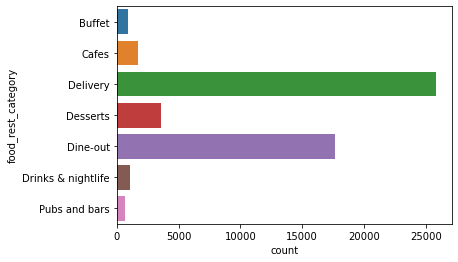

In [42]:
sns.countplot(y=tp_knn.food_rest_category)
tp_knn.food_rest_category.value_counts()/tp_knn.food_rest_category.count()*100

- 50% of the  restaurants registered on Zomato in Bengaluru are of Delivery Category i.e. They include both Dine-out and delivery, unsurprisingly Dine-out category of restaurants come next with 34% of the total restaurants.
##### Is there a realtion between the number of votes and the rating ?
- We will be using the non zero rating dataset for this.

<AxesSubplot:xlabel='votes', ylabel='rating_out_of_5'>

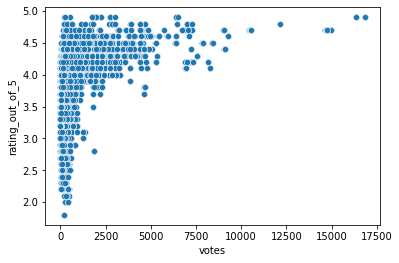

In [43]:
sns.scatterplot(y=tp_nonzero.rating_out_of_5,x=tp_nonzero.votes)

- Though not very conclusive, we can see that most of the restaurants have received 0 to 2500 votes and the ratings vary across the scale. However once the number of votes crosses 2500, there are very few restaurants that have ratings below 4, this tells us that these restaurants are famous and good at whaat they do hence more number of votes and rating.
##### Is there a realtion between the pricing (cost for 2) and the rating ?
- We will be using the non zero rating dataset for this.

<AxesSubplot:xlabel='cost_for_2', ylabel='rating_out_of_5'>

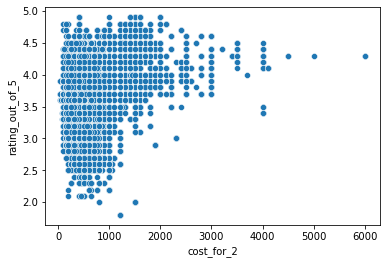

In [44]:
sns.scatterplot(y=tp_nonzero.rating_out_of_5,x=tp_nonzero.cost_for_2)

- The scatterplot is more spread with restaurants having costs for 2 till INR 2000 being rated across the reating scale. The premium restaurants that charge over 2500 can be seen to have better ratings (>3.5) becuase of the quality of service that they provide.
##### Is there a realtion between the number of votes and  pricing (cost for 2)?

<AxesSubplot:xlabel='cost_for_2', ylabel='votes'>

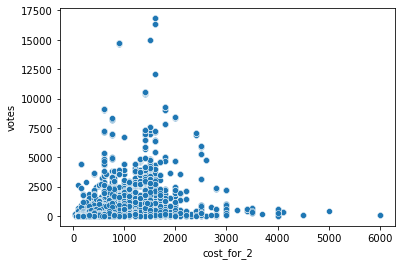

In [45]:
sns.scatterplot(y=tp_knn.votes,x=tp_knn.cost_for_2)

- Though not consistent, on the whole we can see that as the cost for 2 increases, there is a decrease in the number of votes, suggesting that less and less people visit restaurants that are more and more expensive.
##### Which of the restaurant categories cost the highest on an average?

<AxesSubplot:xlabel='cost_for_2', ylabel='food_rest_category'>

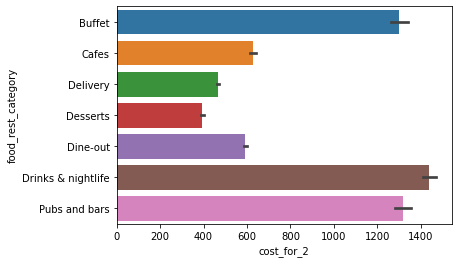

In [46]:
sns.barplot(y=tp_knn.food_rest_category, x=tp_knn.cost_for_2)

- Unsurprisingly Drinks & Nightlife categories of Restaurants cost the highest on an average, closely followed by Pubs and bars and Bugget restaurants.
- On the other hand Dessert restaurants cost the least on an average.
##### The end